# Atividade 1
A tarefa é abordar um problema de classificação binária, para o qual tanto um  um conjunto de treinamento quanto um de validação são fornecidos  (arquivos csv em anexo). O que pedimos é que você trabalhe nesta tarefa de classificação construindo um classificador, com o objetivo de alcançar o melhor desempenho possível. Para a resolução use o python e apresente um Jupyter notebook para discutirmos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
def load_data(path):
    with open(path, "r") as file:
        csv_data = file.readlines()
        
    columns = csv_data[0]
    columns = [x.replace('"', "").replace("\n", "") for x in columns.split(";")]
    result = []
    for data in csv_data[1:]:
        data = [x.replace('"', "").replace("\n", "").replace(",", ".") for x in data.split(";")]
        result.append({key: value for key, value in zip(columns, data)})
        
    return pd.DataFrame(result)

In [4]:
training_data = load_data("./data/Training.csv")
validation_data = load_data("./data/Validation.csv")

In [5]:
training_data.head()

v33 v76    v12 v68    v50 v7 v70  v55        v20 v24 v32   v97 v28 v99 v95  \
0   v   g  17.92   f   1.75  a   t   80   0.000054   1   u  2.82   t   c   t   
1   v   s  16.92   f   0.29  b   f  200  0.0000335   0   y  3.45   f   k  NA   
2  ff   g  31.25   f      0  b   t   96  0.0001125   1   u  3.24   f  ff   t   
3   o   g  48.17   f  0.335  a   f    0  0.0001335   0   u  4.21   f   i  NA   
4   v   g  32.33   t    0.5  b   f  232    0.00035   0   u  3.44   t   k   f   

       v42  v53 v85 v9 v84 v44 classlabel  
0   800000    5   g  0   f   f        no.  
1  2000000    0   p  1   f   f        no.  
2   960000   19   g  0   f   f        no.  
3        0  120   g  1   f   f        no.  
4  2320000    0   g  1   f   f        no.

### Tratamento de valores faltantes

Existem varios valores faltantes, caso seja necessário a remoção de todos de forma imparcial, o dataset é reduzido a menos da metade, para o foco da classificação, foi realizado uma substituição de todos os valores faltantes por um valor "Unknown" para preservar o dataset.

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v33         3700 non-null   object
 1   v76         3700 non-null   object
 2   v12         3700 non-null   object
 3   v68         3700 non-null   object
 4   v50         3700 non-null   object
 5   v7          3700 non-null   object
 6   v70         3700 non-null   object
 7   v55         3700 non-null   object
 8   v20         3700 non-null   object
 9   v24         3700 non-null   object
 10  v32         3700 non-null   object
 11  v97         3700 non-null   object
 12  v28         3700 non-null   object
 13  v99         3700 non-null   object
 14  v95         3700 non-null   object
 15  v42         3700 non-null   object
 16  v53         3700 non-null   object
 17  v85         3700 non-null   object
 18  v9          3700 non-null   object
 19  v84         3700 non-null   object
 20  v44     

In [7]:
for x in training_data:
    if "NA" in training_data[x].unique():
        training_data[x] = training_data[training_data[x] != "NA"]
        training_data[x] = np.where(training_data[x].isnull(),"Unknown", training_data[x])
        
for x in validation_data:
    if "NA" in validation_data[x].unique():
        validation_data[x] = validation_data[validation_data[x] != "NA"]
        validation_data[x] = np.where(validation_data[x].isnull(),"Unknown", validation_data[x])

### Tratamento das colunas numericas

In [8]:
numeric_columns = ["v50", "v20", "v24", "v97","v53", "v9"]
training_data[numeric_columns] = training_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
validation_data[numeric_columns] = validation_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [9]:
training_data.head()

v33 v76 v12 v68    v50  v7 v70 v55       v20  v24 v32   v97 v28 v99  \
0   v   g   v   f  1.750   v   t   v  0.000054    1   v  2.82   t   v   
1   v   s   v   f  0.290   v   f   v  0.000034    0   v  3.45   f   v   
2  ff   g  ff   f  0.000  ff   t  ff  0.000112    1  ff  3.24   f  ff   
3   o   g   o   f  0.335   o   f   o  0.000133    0   o  4.21   f   o   
4   v   g   v   t  0.500   v   f   v  0.000350    0   v  3.44   t   v   

       v95 v42  v53 v85  v9 v84 v44 classlabel  
0        v   v    5   v   0   f   f        no.  
1  Unknown   v    0   v   1   f   f        no.  
2       ff  ff   19  ff   0   f   f        no.  
3  Unknown   o  120   o   1   f   f        no.  
4        v   v    0   v   1   f   f        no.

### Tratamento das colunas categoricas

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
colums = ["v12", "v55", "v42", "v33", "v76", "v68", "v7", "v70", "v32", "v28","v99", "v95", "v85", "v84", "v44"]

In [12]:
for column in colums:
    encoder = LabelEncoder()
    encoded = encoder.fit_transform(training_data[column].astype(str))
    training_data[column] = encoded
    
for column in colums:
    encoder = LabelEncoder()
    encoded = encoder.fit_transform(validation_data[column].astype(str))
    validation_data[column] = encoded

In [13]:
pd.get_dummies(training_data["classlabel"])

no.  yes.
0       1     0
1       1     0
2       1     0
3       1     0
4       1     0
...   ...   ...
3695    0     1
3696    0     1
3697    0     1
3698    0     1
3699    0     1

[3700 rows x 2 columns]

In [14]:
training_data["classlabel"] = pd.get_dummies(training_data["classlabel"], drop_first=True)
validation_data["classlabel"] = pd.get_dummies(validation_data["classlabel"], drop_first=True)

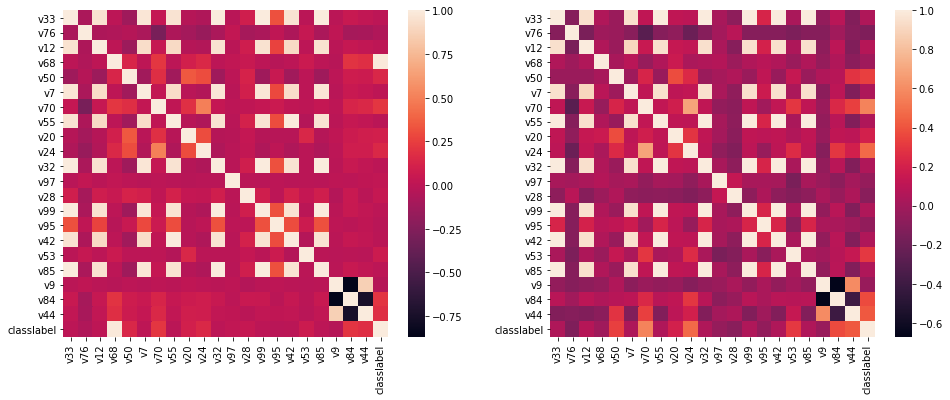

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(training_data.corr(), ax=ax[0])
sns.heatmap(validation_data.corr(), ax=ax[1]);

O dataset de treinamento contem um desbalanceamento muito grande para a classe 1 (no), para a solução será feito uma redução na qualidade baseado no numero da classe 0 (yes).

In [16]:
training_data["classlabel"].value_counts()

1    3424
0     276
Name: classlabel, dtype: int64

In [17]:
yes = training_data[training_data["classlabel"] == 1].count()[0] / (training_data[training_data["classlabel"] == 1].count()[0] + training_data[training_data["classlabel"] == 0].count()[0])
no = training_data[training_data["classlabel"] == 0].count()[0] / (training_data[training_data["classlabel"] == 1].count()[0] + training_data[training_data["classlabel"] == 0].count()[0])

print("Yes target: {:.4f}%".format(no))
print("No target: {:.4f}%".format(yes))

Yes target: 0.0746%
No target: 0.9254%


In [18]:
training_data_class_0 = training_data[training_data["classlabel"] == 0]
training_data_class_1 = training_data[training_data["classlabel"] == 1].sample(int(len(training_data_class_0.index) +  (len(training_data_class_0.index) * 0.2)), replace=True)
training_data = pd.concat([training_data_class_0, training_data_class_1])

In [19]:
training_data["classlabel"].value_counts()

1    331
0    276
Name: classlabel, dtype: int64

### Teste de modelos

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import classification_report, accuracy_score

In [21]:
train_feature = training_data.drop("classlabel", axis=1).values
train_target = training_data["classlabel"]

val_feature = validation_data.drop("classlabel", axis=1).values
val_target = validation_data["classlabel"]

### Random forest

In [22]:
parameters = {"n_estimators": np.arange(5, 100)}
random_fores = RandomForestClassifier()

gs = GridSearchCV(random_fores, parameters)
rf_model = gs.fit(train_feature, train_target)

In [23]:
print(rf_model.best_params_)
pred = rf_model.predict(val_feature)
print(classification_report(pred, val_target))
print(accuracy_score(pred, val_target))

{'n_estimators': 8}
              precision    recall  f1-score   support

           0       0.50      0.53      0.52       101
           1       0.49      0.46      0.48        99

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

0.5


### XGBoost

In [24]:
XGBoost = GradientBoostingClassifier()
xgb_model = XGBoost.fit(train_feature, train_target)

In [25]:
pred = xgb_model.predict(val_feature)
print(classification_report(pred, val_target))
print(accuracy_score(pred, val_target))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51       100
           1       0.49      0.46      0.48       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

0.495


### MLP

In [26]:
input_shape = train_feature.shape[1]

In [27]:
model = Sequential()
model.add(Dense(32, input_shape=(input_shape,), activation='relu', 
          kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
          bias_regularizer=regularizers.l2(1e-3),
          activity_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["acc"])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
callback_save = ModelCheckpoint("./weights/atividade_keras.h5", monitor="val_loss", save_best_only=True)

history = model.fit(train_feature, train_target, epochs=50, batch_size=16, 
                    validation_data=(val_feature, val_target), callbacks=[callback_save, early_stopping])

Epoch 1/50
38/38 [==============================] - 1s 5ms/step - loss: 2627.3423 - acc: 0.5321 - val_loss: 112.9157 - val_acc: 0.6350
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 2233.8059 - acc: 0.6178 - val_loss: 94.1617 - val_acc: 0.6850
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 1945.8550 - acc: 0.6096 - val_loss: 81.0513 - val_acc: 0.7250
Epoch 4/50
38/38 [==============================] - 0s 2ms/step - loss: 1686.6155 - acc: 0.6557 - val_loss: 68.0678 - val_acc: 0.7350
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 1454.2230 - acc: 0.6524 - val_loss: 60.6947 - val_acc: 0.7750
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 1258.7118 - acc: 0.6886 - val_loss: 52.3056 - val_acc: 0.7400
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 1107.3451 - acc: 0.6458 - val_loss: 44.1115 - val_acc: 0.7650
Epoch 8/50
38/38 [==============================] - 0s 2ms/st

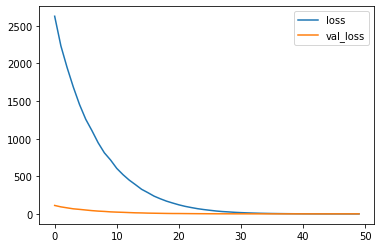

In [29]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label ="val_loss")
plt.legend();

### Conclusão

O dataset apresenta uma boa correlação com os dados, porém, aparenta ter uma certa complexidade, alem disto ainda houve uma grande redução das amostras baseado no desbalanceamento do dataset, que poderia gerar um vies tendencioso para o "Yes" que abrange mais de 92% de todo o dataset. Os valores para os modelos XGBoost e Random Forest não se sairam bem como esperado, o MLP que é um modelo mais complexo teve um melhor resultado aparente.